<a href="https://colab.research.google.com/github/loujjj/Machine-Learning/blob/main/PCT03_Tabor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Walk vs Run**

####**Importing the Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Importing and Preparing the Data**

#####**Importing the Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
cd gdrive/MyDrive/'Colab Notebooks'/Book/Datasets

/content/gdrive/MyDrive/Colab Notebooks/Book/Datasets


**NOTE: You have to save the attached csv file to one of your subfolders in Google Drive and change the name of the subfolder below, accordingly.**

In [4]:
ls

walkvsrun.csv


The walk vs run data set.

In [5]:
dataset = pd.read_csv('walkvsrun.csv', header=None)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 5201 entries, 0 to 5200
dtypes: float64(5200), int64(1)
memory usage: 7.6 MB
None


In [6]:
print(dataset.shape)
print(dataset.head(5))

(192, 5201)
      0        1        2        3       4        5         6        7     \
0 -8.45340 -5.99020 -3.98400 -2.47060 -1.3035 -0.49068 -0.041913 -0.59172   
1 -4.17710 -4.67900 -5.08760 -5.31620 -5.6017 -5.70730 -5.379100 -4.75640   
2 -2.42120 -2.43750 -2.48920 -2.50000 -2.5082 -2.51100 -2.548200 -2.57450   
3  0.26166 -0.13816 -0.22947 -0.46808 -1.0790 -1.88940 -2.691600 -3.91420   
4 -0.63378  0.10523  0.79335  1.76780  3.7666  8.38150  8.533500  5.18550   

     8        9     ...    5191    5192    5193    5194    5195    5196  \
0 -1.2731 -2.99890  ...  20.969  20.985  21.001  21.018  21.034  21.050   
1 -4.1548 -3.54730  ...  20.969  20.985  21.001  21.018  21.034  21.050   
2 -2.5625 -2.55620  ...  20.968  20.985  21.001  21.017  21.033  21.050   
3 -5.8555 -7.46060  ...  20.968  20.984  21.001  21.017  21.033  21.049   
4  2.0530 -0.26899  ...  20.968  20.984  21.001  21.017  21.033  21.049   

     5197    5198    5199  5200  
0  21.066  21.083  21.099     1  
1  21.

#####**Preparing the Data**

The first up to the second to the last columns will become our input, which we will assign to the variable $X$.

In [7]:
X = dataset.loc[:,0:dataset.shape[1]-2]
print(X.shape)

(192, 5200)


The last column will become our label, which we will assign to the variable $y$.

In [8]:
y_dataset = dataset.loc[:,dataset.shape[1]-1]
y_label = np.array(y_dataset)
y = tf.keras.utils.to_categorical(y_label)
print(y.shape)

(192, 2)


####**Defining the model**

**Task 1.**

Using the *train_test_split()* function, split the training data, validation data, and test data into 80%, 10%, and 10%, respectively.<br>

Assign training input data to the *X_train* and the label input data to *y_train*. Assign validation input data to the *X_val* and the label input data to *y_val*. Assign test input data to the *X_test* and the label input data to *y_test*.

In [9]:
# Write down the values here
trainRatio = 80/100
valRatio = 10/100
testRatio = 10/100

# Split the training, validation and test data. Write your code below this line.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  1-  trainRatio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = testRatio/(testRatio + valRatio))


In [10]:
print(X_val.shape)

(19, 5200)


In [11]:
print(y_val.shape)

(19, 2)


In [12]:
print(y_test.shape)

(20, 2)


**Task 2.**
<br>
Set up your network *model*. Use three layers - an input layer, a hidden layer and an output layer. Use a reasonable number of nodes for the hidden layer. Display the summary of the model.

In [61]:
# Write your code here.
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv1D(52, (2), activation = 'relu',input_shape = (X_train.shape[1],1)),
    tf.keras.layers.MaxPooling1D((2), input_shape = X_train.shape),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 5199, 52)          156       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 2599, 52)         0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 135148)            0         
                                                                 
 dropout_9 (Dropout)         (None, 135148)            0         
                                                                 
 dense_20 (Dense)            (None, 150)               20272350  
                                                                 
 dense_21 (Dense)            (None, 2)                 302       
                                                      

**Task 3.**
<br>
Compile your model using the *compile* function, and set up the optimizer and the loss. You can find the various loss functions you can use in this [weblink](https://keras.io/api/losses/). Use 'accuracy' as the metric.

In [62]:
# Write your code here.
model.compile(keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

**Task 4.**
<br>
Train your model using the fit function. You may select your own number of epochs. Choose verbose = 1. You will need to assign the output to the variable history, so that you'll be able to see what happens during the training.

In [63]:
# Write your code here.
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
5/5 [==============================] - 4s 561ms/step - loss: 29.4074 - accuracy: 0.6078 - val_loss: 16.4934 - val_accuracy: 0.7368
Epoch 2/30
5/5 [==============================] - 3s 511ms/step - loss: 11.9356 - accuracy: 0.7320 - val_loss: 4.2499 - val_accuracy: 0.7895
Epoch 3/30
5/5 [==============================] - 3s 599ms/step - loss: 3.4253 - accuracy: 0.8758 - val_loss: 6.8623 - val_accuracy: 0.8421
Epoch 4/30
5/5 [==============================] - 4s 825ms/step - loss: 2.0340 - accuracy: 0.9412 - val_loss: 1.1203 - val_accuracy: 0.8421
Epoch 5/30
5/5 [==============================] - 2s 499ms/step - loss: 1.4592 - accuracy: 0.9216 - val_loss: 1.8376 - val_accuracy: 0.9474
Epoch 6/30
5/5 [==============================] - 3s 504ms/step - loss: 0.3497 - accuracy: 0.9804 - val_loss: 4.5004 - val_accuracy: 0.9474
Epoch 7/30
5/5 [==============================] - 2s 502ms/step - loss: 0.8587 - accuracy: 0.9477 - val_loss: 4.5646 - val_accuracy: 0.9474
Epoch 8/30
5/5 [=

**Task 5.**
<br>
Evaluate your model using the test data set. Display the loss function vs the number of epochs.

1/1 [==============================] - 0s 66ms/step - loss: 0.3965 - accuracy: 0.9500


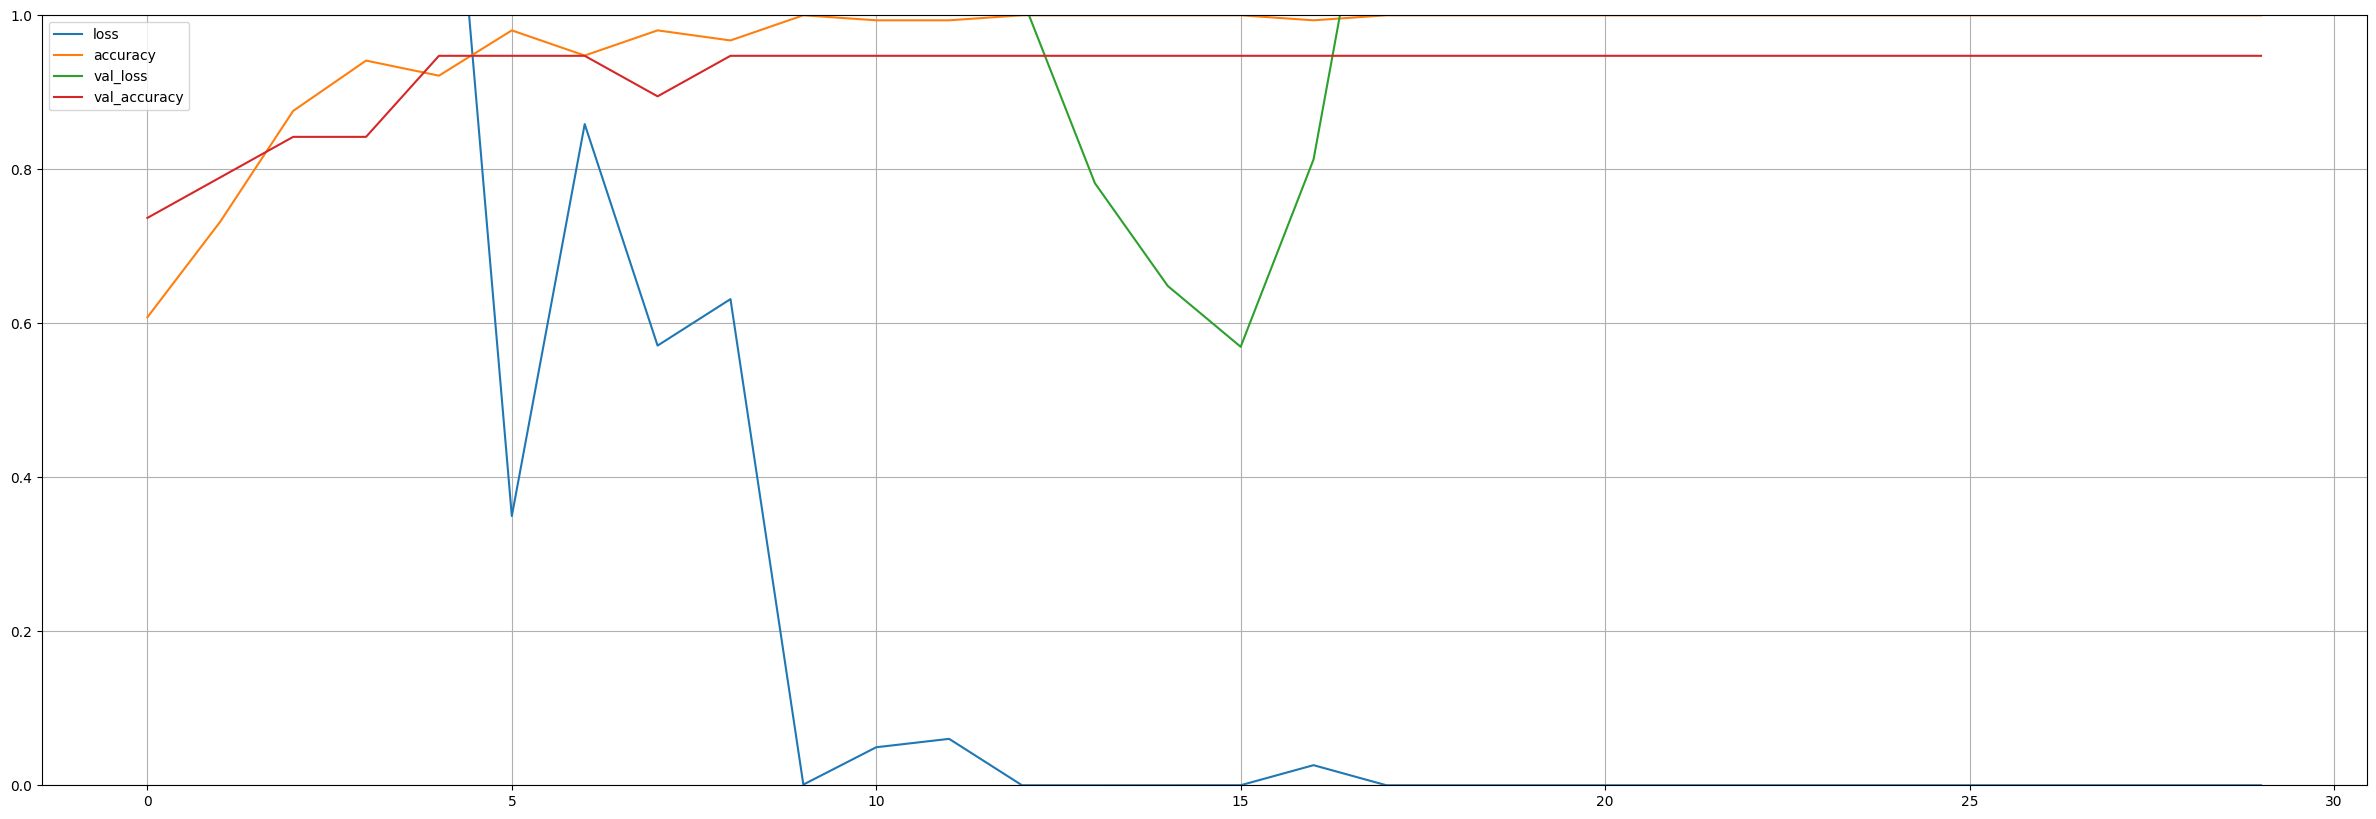

In [64]:
# Write your code here.
model.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot(figsize=(30,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Task 6.**
<br>
Predict the output with your model with the predict function using the test input data set. Display the confusion matrix and the accuracy of your model with the test data set.

In [65]:
# Write your code here.
prediction = model.predict(X_test)
print(prediction)
print(len(prediction))

1/1 [==============================] - 0s 126ms/step
[[9.9999994e-01 1.4797104e-21]
 [9.9999994e-01 2.9103344e-37]
 [9.9999994e-01 6.0298789e-21]
 [0.0000000e+00 9.9999994e-01]
 [9.9999994e-01 8.6436343e-28]
 [9.9999994e-01 0.0000000e+00]
 [1.5715988e-18 9.9999994e-01]
 [0.0000000e+00 9.9999994e-01]
 [9.9999994e-01 1.0318244e-18]
 [9.9963975e-01 3.6023339e-04]
 [9.9999994e-01 0.0000000e+00]
 [2.0142286e-13 9.9999994e-01]
 [3.8152849e-16 9.9999994e-01]
 [0.0000000e+00 9.9999994e-01]
 [0.0000000e+00 9.9999994e-01]
 [9.9999994e-01 8.0687319e-32]
 [1.0000000e+00 1.4508678e-30]
 [2.2241001e-03 9.9777585e-01]
 [1.0000000e+00 3.4727395e-26]
 [1.0000000e+00 1.0993378e-29]]
20


In [66]:
print(y_test)
print(len(y_test))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
20


In [67]:
cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))

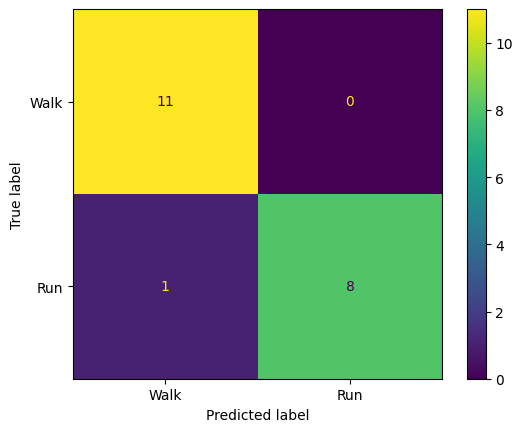

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Walk', 'Run'])
disp.plot()
plt.show()

In [69]:
accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

95.0
